# 1. 线性回归

## 1.1 单变量线性回归
### 单变量线性回归公式
$$h_{w,b}(x)=b+wx$$
$w$和$b$是参数，为了方便运算，可以给$x$加上一个$x_0$
$$h_{w,b}(x)=bx_{0}+wx_{1}$$
### 损失函数
$$J(w,b)=\frac{1}{2m}\sum_{i=1}^{m}(h_{w,b}(x^{(i)})-y^{(i)})^{2}$$#
### 优化算法——梯度下降
$$w_j=w_{j}-\alpha\frac{\partial}{\partial{w_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})x^{(i)}}$$
$$b_j=b_{j}-\alpha\frac{\partial}{\partial{b_j}}{J(w,b)}=w_{j}-\alpha \frac{1}{m}\sum_{i=1}^{m}{(h_{w,b}(x^{(i)})-y^{(i)})}$$

### python代码

In [1]:
import time

import matplotlib.pyplot as plt
import numpy as np
from utils import square_loss

读取数据集

In [2]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

查看数据集

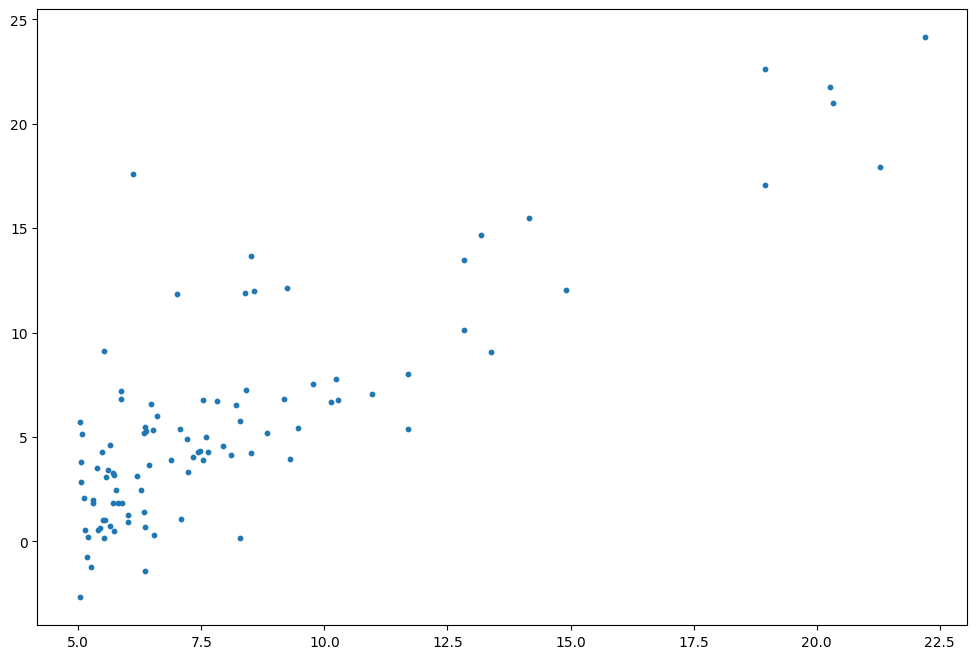

In [3]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=data[:, 0], y=data[:, 1], s=10)
plt.show()

分割训练集和验证集

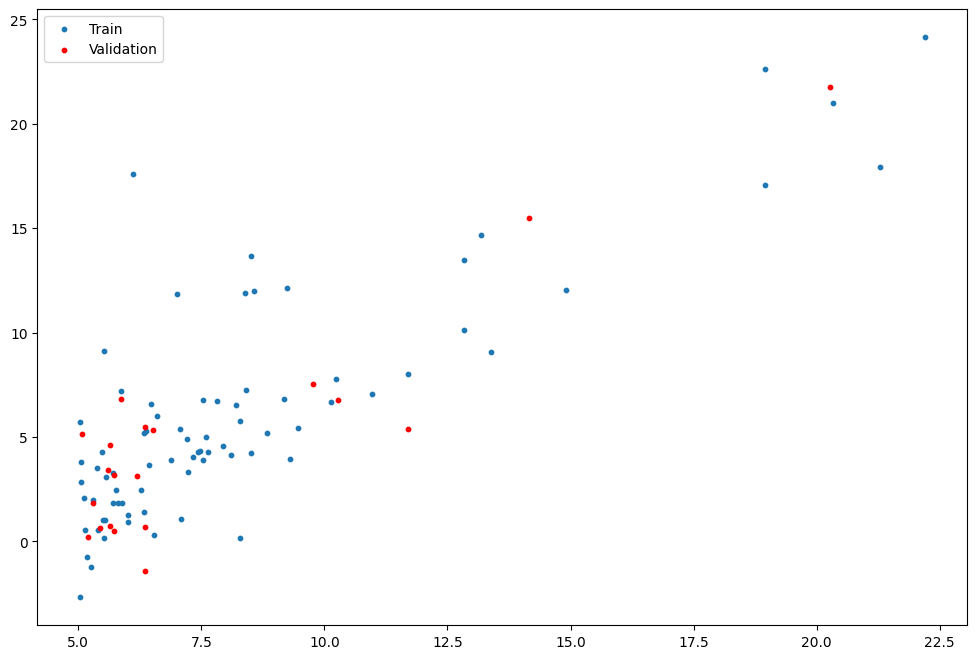

In [4]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data[:, 0], data[:, 1], test_size=0.2)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x=train_x, y=train_y, s=10, label="Train")
ax.scatter(x=val_x, y=val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

扩展维度，从长度为$n$的向量变成$n\times 1$的矩阵

In [5]:
train_x_ex = np.expand_dims(train_x,axis=1)
train_y_ex = np.expand_dims(train_y,axis=1)
val_x_ex = np.expand_dims(val_x,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

train_x_ex.shape

(77, 1)

调入线性回归类，获得参数矩阵和训练损失序列，记录训练时间

**运行速度：**
原版本：循环计算每一个参数，进行更新
```
error = pred - y
repeat{
    theta[0,i]=theta[0,i] - ((alpha / len(X)) * np.sum(np.multiply(error, x[:,i])))
}
```
改进后：使用numpy的矩阵运算，直接计算出$(d+1) \times (d+1)$的梯度矩阵，取对角线元素就是每个参数的梯度
```
error shape: (d+1, n)
error_1, error_2, ···, error_n
...
...
error_1, error_2, ···, error_n


theta = theta -  ((alpha / len(X)) * np.matmul(error, x).diagonal().T
```

In [6]:
from utils import LinearRegression

epochs = 500
alpha = 0.02
linear_reg = LinearRegression(x=train_x_ex,y=train_y_ex,lr=alpha,epoch=epochs)
start_time = time.time()
theta,loss = linear_reg.run()
end_time = time.time()

theta

Epoch: 1/500, Train Loss: 33.6699
Epoch: 2/500, Train Loss: 19.1693
Epoch: 3/500, Train Loss: 12.2812
Epoch: 4/500, Train Loss: 9.0069
Epoch: 5/500, Train Loss: 7.4481
Epoch: 6/500, Train Loss: 6.7038
Epoch: 7/500, Train Loss: 6.3461
Epoch: 8/500, Train Loss: 6.1719
Epoch: 9/500, Train Loss: 6.0850
Epoch: 10/500, Train Loss: 6.0395
Epoch: 11/500, Train Loss: 6.0136
Epoch: 12/500, Train Loss: 5.9972
Epoch: 13/500, Train Loss: 5.9852
Epoch: 14/500, Train Loss: 5.9754
Epoch: 15/500, Train Loss: 5.9666
Epoch: 16/500, Train Loss: 5.9584
Epoch: 17/500, Train Loss: 5.9504
Epoch: 18/500, Train Loss: 5.9426
Epoch: 19/500, Train Loss: 5.9349
Epoch: 20/500, Train Loss: 5.9273
Epoch: 21/500, Train Loss: 5.9198
Epoch: 22/500, Train Loss: 5.9123
Epoch: 23/500, Train Loss: 5.9048
Epoch: 24/500, Train Loss: 5.8975
Epoch: 25/500, Train Loss: 5.8901
Epoch: 26/500, Train Loss: 5.8828
Epoch: 27/500, Train Loss: 5.8756
Epoch: 28/500, Train Loss: 5.8684
Epoch: 29/500, Train Loss: 5.8613
Epoch: 30/500, Train

array([[-2.99360735,  1.10968427]])

查看训练时间

In [9]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.0319s


计算在验证集上的损失

In [10]:
pred_val = linear_reg.prediction(val_x_ex)
loss_val_arr = square_loss(pred_val, val_y_ex)
loss_val = np.sum(loss_val_arr)/(2 * val_y_ex.shape[0])
print("Val Loss: {:.4f}".format(loss_val))

Val Loss: 3.2449


使用sklearn库函数进行验证

In [11]:
from sklearn.linear_model import LinearRegression
sklearn_lr = LinearRegression()
sk_start_time = time.time()
sklearn_lr.fit(train_x_ex,train_y_ex)
sk_end_time = time.time()

sk_theta = [sklearn_lr.intercept_[0],sklearn_lr.coef_[0, 0]]
sk_lr_pred = sklearn_lr.predict(val_x_ex)
sk_loss_val_arr = square_loss(sk_lr_pred, val_y_ex)
sk_loss_val = np.sum(sk_loss_val_arr)/(2 * val_y_ex.shape[0])
print("Sklearn Val Loss: {:.4f}".format(sk_loss_val))
print("Sklearn Parameters: ", sklearn_lr.intercept_, sklearn_lr.coef_)
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))

Sklearn Val Loss: 3.0534
Sklearn Parameters:  [-3.62633214] [[1.1725399]]
Sklearn Train Time: 0.0000s


画出预测的直线

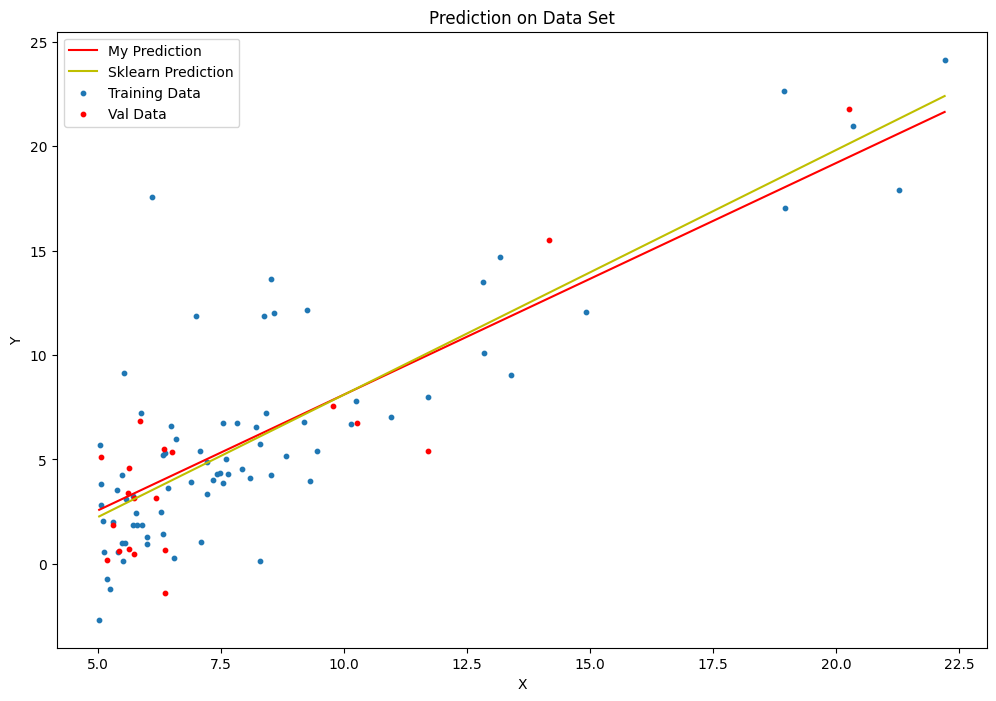

In [12]:
x = np.linspace(data[:, 0].min(), data[:, 0].max(), 100)
f = theta[0, 0] + (theta[0, 1] * x)
f1 = sk_theta[0] + (sk_theta[1] * x)
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='My Prediction')
ax.plot(x, f1, 'y', label='Sklearn Prediction')
ax.scatter(train_x, train_y, label='Training Data', s=10)
ax.scatter(val_x, val_y, label='Val Data', color="red", s=10)
ax.legend(loc=2)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Prediction on Data Set')
plt.show()

画出训练损失曲线

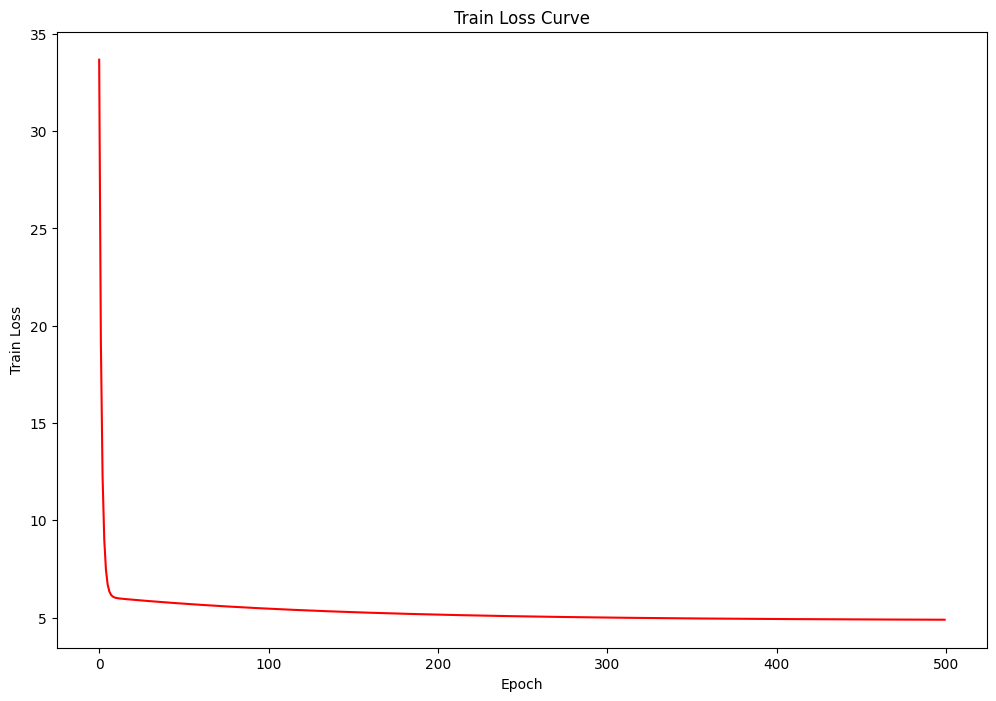

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(epochs), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()

## 多变量线性回归

加载数据集

In [14]:
data2 = np.loadtxt('ex1data2.txt', delimiter=',')
data2

array([[2.10400e+03, 3.00000e+00, 3.99900e+05],
       [1.60000e+03, 3.00000e+00, 3.29900e+05],
       [2.40000e+03, 3.00000e+00, 3.69000e+05],
       [1.41600e+03, 2.00000e+00, 2.32000e+05],
       [3.00000e+03, 4.00000e+00, 5.39900e+05],
       [1.98500e+03, 4.00000e+00, 2.99900e+05],
       [1.53400e+03, 3.00000e+00, 3.14900e+05],
       [1.42700e+03, 3.00000e+00, 1.98999e+05],
       [1.38000e+03, 3.00000e+00, 2.12000e+05],
       [1.49400e+03, 3.00000e+00, 2.42500e+05],
       [1.94000e+03, 4.00000e+00, 2.39999e+05],
       [2.00000e+03, 3.00000e+00, 3.47000e+05],
       [1.89000e+03, 3.00000e+00, 3.29999e+05],
       [4.47800e+03, 5.00000e+00, 6.99900e+05],
       [1.26800e+03, 3.00000e+00, 2.59900e+05],
       [2.30000e+03, 4.00000e+00, 4.49900e+05],
       [1.32000e+03, 2.00000e+00, 2.99900e+05],
       [1.23600e+03, 3.00000e+00, 1.99900e+05],
       [2.60900e+03, 4.00000e+00, 4.99998e+05],
       [3.03100e+03, 4.00000e+00, 5.99000e+05],
       [1.76700e+03, 3.00000e+00, 2.5290

In [27]:
data2_norm = (data2 - data2.mean(axis=0)) / data2.std(axis=0)
data2_norm

array([[ 1.31415422e-01, -2.26093368e-01,  4.80890225e-01],
       [-5.09640698e-01, -2.26093368e-01, -8.49833796e-02],
       [ 5.07908699e-01, -2.26093368e-01,  2.31097448e-01],
       [-7.43677059e-01, -1.55439190e+00, -8.76398036e-01],
       [ 1.27107075e+00,  1.10220517e+00,  1.61263744e+00],
       [-1.99450507e-02,  1.10220517e+00, -3.27500639e-01],
       [-5.93588523e-01, -2.26093368e-01, -2.06242009e-01],
       [-7.29685755e-01, -2.26093368e-01, -1.14317510e+00],
       [-7.89466782e-01, -2.26093368e-01, -1.03807621e+00],
       [-6.44465993e-01, -2.26093368e-01, -7.91516995e-01],
       [-7.71822042e-02,  1.10220517e+00, -8.11734851e-01],
       [-8.65999486e-04, -2.26093368e-01,  5.32514582e-02],
       [-1.40779041e-01, -2.26093368e-01, -8.41830726e-02],
       [ 3.15099326e+00,  2.43050370e+00,  2.90606282e+00],
       [-9.31923697e-01, -2.26093368e-01, -6.50856985e-01],
       [ 3.80715024e-01,  1.10220517e+00,  8.85085658e-01],
       [-8.65782986e-01, -1.55439190e+00

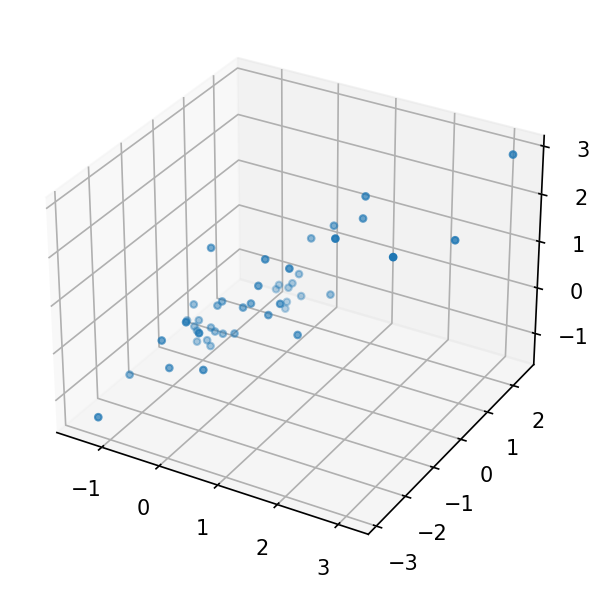

In [28]:
plt.figure(dpi=150)
ax = plt.axes(projection='3d')
ax.scatter3D(data2_norm[:,0],data2_norm[:,1],data2_norm[:,2],s=10)
plt.show()

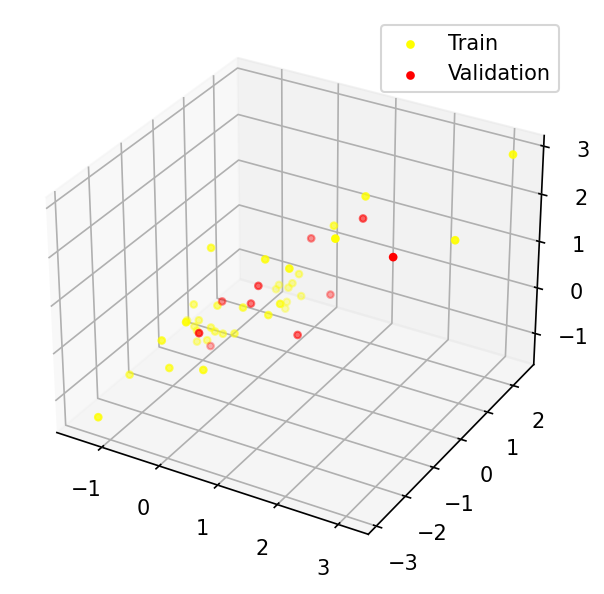

In [29]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data2_norm[:, :2], data2_norm[:, 2], test_size=0.2)
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.legend()
plt.show()

In [30]:
train_y_ex = np.expand_dims(train_y,axis=1)
val_y_ex = np.expand_dims(val_y,axis=1)

In [36]:
from utils import LinearRegression

alpha = 0.01
epochs = 500
multi_lr = LinearRegression(train_x,train_y_ex,epoch=epochs,lr=alpha)
start_time = time.time()
theta, loss = multi_lr.run()
end_time = time.time()
theta

Epoch: 1/500, Train Loss: 0.5182
Epoch: 2/500, Train Loss: 0.5078
Epoch: 3/500, Train Loss: 0.4978
Epoch: 4/500, Train Loss: 0.4881
Epoch: 5/500, Train Loss: 0.4787
Epoch: 6/500, Train Loss: 0.4696
Epoch: 7/500, Train Loss: 0.4608
Epoch: 8/500, Train Loss: 0.4523
Epoch: 9/500, Train Loss: 0.4440
Epoch: 10/500, Train Loss: 0.4360
Epoch: 11/500, Train Loss: 0.4282
Epoch: 12/500, Train Loss: 0.4207
Epoch: 13/500, Train Loss: 0.4134
Epoch: 14/500, Train Loss: 0.4063
Epoch: 15/500, Train Loss: 0.3995
Epoch: 16/500, Train Loss: 0.3929
Epoch: 17/500, Train Loss: 0.3864
Epoch: 18/500, Train Loss: 0.3802
Epoch: 19/500, Train Loss: 0.3742
Epoch: 20/500, Train Loss: 0.3683
Epoch: 21/500, Train Loss: 0.3627
Epoch: 22/500, Train Loss: 0.3572
Epoch: 23/500, Train Loss: 0.3518
Epoch: 24/500, Train Loss: 0.3466
Epoch: 25/500, Train Loss: 0.3416
Epoch: 26/500, Train Loss: 0.3368
Epoch: 27/500, Train Loss: 0.3320
Epoch: 28/500, Train Loss: 0.3275
Epoch: 29/500, Train Loss: 0.3230
Epoch: 30/500, Train Lo

array([[ 0.00685863,  0.86168108, -0.02396227]])

In [37]:
print("Train Time: {:.4f}s".format(end_time-start_time))

Train Time: 0.0299s


In [38]:
pred = multi_lr.prediction(val_x)
multi_loss_arr = square_loss(pred, val_y_ex)
multi_loss = np.sum(multi_loss_arr) / (2 * pred.shape[0])
print("Val Loss: {:.4f}".format(multi_loss))

Val Loss: 0.1482


In [39]:
from sklearn.linear_model import LinearRegression
sk_multi_lr = LinearRegression()
sk_start_time = time.time()
sk_multi_lr.fit(train_x,train_y_ex)
sk_end_time = time.time()

sk_lr_pred = sk_multi_lr.predict(val_x)
sk_loss_arr = square_loss(sk_lr_pred, val_y_ex)
sk_loss = np.sum(sk_loss_arr) / (2 * pred.shape[0])

sk_theta = np.array([[sk_multi_lr.intercept_[0],sk_multi_lr.coef_[0,0],sk_multi_lr.coef_[0,1]]])
print("Sklearn Train Time: {:.4f}s".format(sk_end_time-sk_start_time))
print("Sklearn Val Loss: {:.4f}".format(sk_loss))
print("Sklearn parameters: ", sk_multi_lr.intercept_, sk_multi_lr.coef_)

Sklearn Train Time: 0.0010s
Sklearn Val Loss: 0.1596
Sklearn parameters:  [0.01980025] [[ 0.93576921 -0.09194324]]


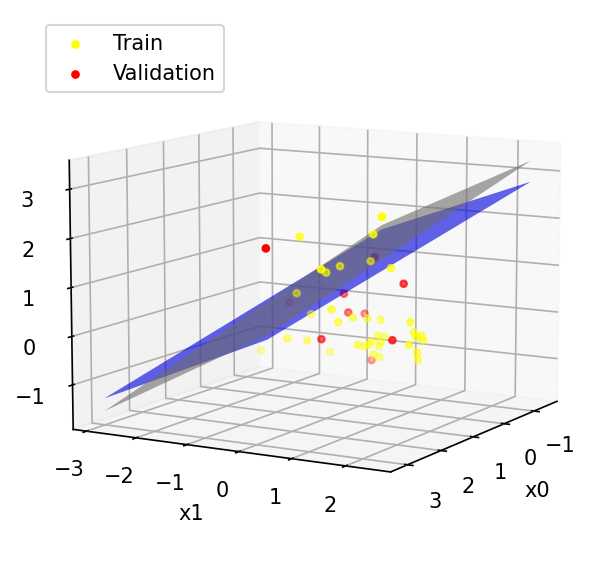

In [45]:
plt.figure(dpi=150)
ax = plt.axes(projection="3d")
x = np.linspace(data2_norm[:,0].min(), data2_norm[:,0].max(), num=100)
y = np.linspace(data2_norm[:,1].min(), data2_norm[:,1].max(), num=100)

xx, yy = np.meshgrid(x, y)

z1 = np.zeros((100, 100))
z2 = np.zeros((100, 100))

for i in range(100):
    for j in range(100):
        z1[i,j] = theta[0,0] + theta[0,1] * x[i] + theta[0,2] * y[j]
        z2[i,j] = sk_theta[0,0] + sk_theta[0,1] * x[i] + sk_theta[0,2] * y[j]

ax.plot_surface(xx,yy,z1,alpha=0.8, rstride=3, cstride=1, color="blue")
ax.plot_surface(xx,yy,z2,alpha=0.8, rstride=3, cstride=1, color="gray")
ax.scatter3D(train_x[:,0], train_x[:,1],train_y, s=10, color="yellow", label="Train")
ax.scatter3D(val_x[:,0], val_x[:,1], val_y, s=10, color="red", label="Validation")
ax.set_xlabel("x0")
ax.set_ylabel("x1")
ax.view_init(elev=10, azim=30)
plt.legend(loc=2)
plt.show()

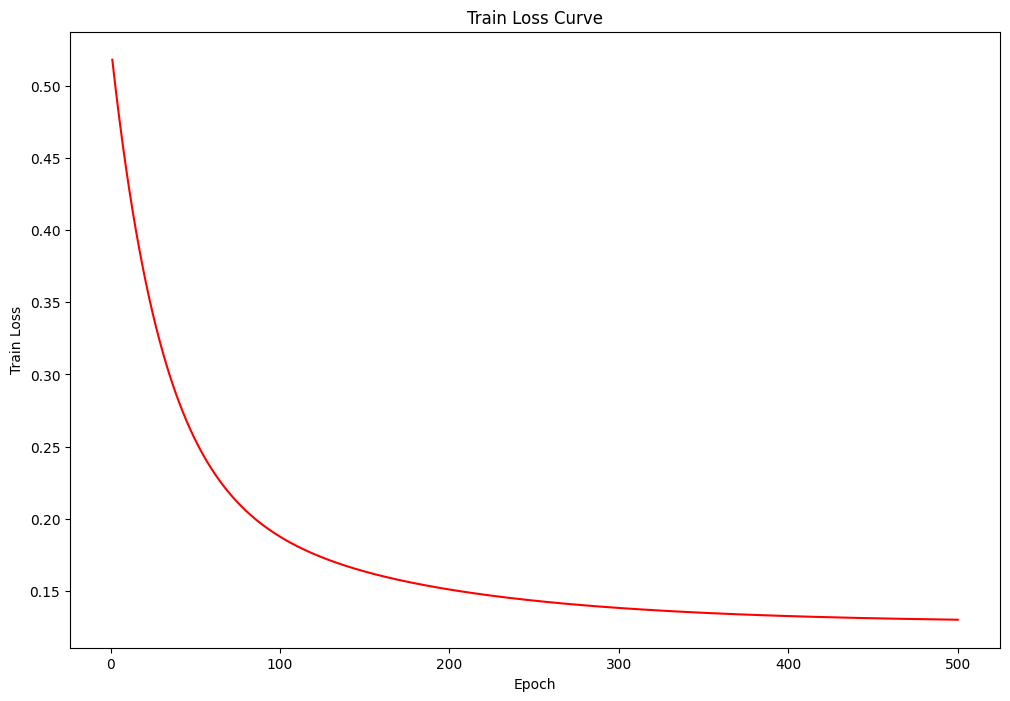

In [46]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(1,epochs+1), loss, 'r')
ax.set_xlabel('Epoch')
ax.set_ylabel('Train Loss')
ax.set_title('Train Loss Curve')
plt.show()